# Introduction
> - **This dataset is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs.**

> - **WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators are almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "they're good dogs Brent." WeRateDogs has over 4 million followers and has received international media coverage.**

In [1]:
#Import the libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import json
import os
import requests
import warnings


%matplotlib inline
warnings.filterwarnings("ignore")

# Data Wrangling

> - **The objective of this project is to gather data from different sources, to be assessed and then to perform cleansing techniques to raise the quality and tidiness of the data. Hence, it can be used in any later analysis.**

> ## Gather the data

In [2]:
twitter_archive = pd.read_csv("C:/Users/kariu/OneDrive/Desktop/Data Science/Twitter_Data/twitter-archive-enhanced-2.csv")
twitter_archive.shape

(2356, 17)

In [3]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


> - Download image files

In [4]:
folder_name = 'image_predictions_file'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
    
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)


with open('image_predictions.tsv' , 'wb') as file:
    file.write(response.content)

    
image_predictions = pd.read_csv('image_predictions.tsv' , '\t')

image_predictions.shape

(2075, 12)

In [5]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


> - Import twitter_json.txt and read it line by line to extract tweet ID, retweet count, and favorite count

In [6]:
#opening json file 
df_list = []

with open('C:/Users/kariu/OneDrive/Desktop/Data Science/Twitter_Data/tweet-json/tweet_json.txt') as file:
    for line in file:
        df_list.append(json.loads(line))

In [7]:
#reading json file data
tweet_data=pd.DataFrame(df_list)
tweet_data.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,False,False,en,NaN,NaN,NaN,NaN
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,892177421306343426,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,False,False,en,NaN,NaN,NaN,NaN
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,False,False,en,NaN,NaN,NaN,NaN
3,Sun Jul 30 15:58:51 +0000 2017,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,False,False,en,NaN,NaN,NaN,NaN
4,Sat Jul 29 16:00:24 +0000 2017,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,False,False,en,NaN,NaN,NaN,NaN


## Data Assessment and Cleaning

> - **We have gathered our data from 3 different sources, basic acrhived data from WeRateDogs, dogs breeds provided by some volunteer who applied neutral network classification process on images attached with the tweets, and downloaded live data for those tweets using twitter API. Now let us do data assessment to detect any quality or tidy issues in the data.**

_It is enough to find 8 quality issues, and 2 tidy issue. And as the data might contain more than this, I am going to the follow the project requirements._

> - **Data Assessment and Cleaning can be done in iteration. I am going to mark every iteration of assessment followed by cleaning as a `Round`. and I am going to list list of quality and tidiness issues for each round.**

In [8]:
all_df = twitter_archive.set_index('tweet_id').join(tweet_data.set_index('id_str'),lsuffix='_basic', rsuffix='_extended')
all_df = all_df.join(image_predictions.set_index('tweet_id'),lsuffix='', rsuffix='_breed')
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2356 entries, 892420643555336193 to 666020888022790149
Data columns (total 57 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   in_reply_to_status_id_basic     78 non-null     float64
 1   in_reply_to_user_id_basic       78 non-null     float64
 2   timestamp                       2356 non-null   object 
 3   source_basic                    2356 non-null   object 
 4   text                            2356 non-null   object 
 5   retweeted_status_id             181 non-null    float64
 6   retweeted_status_user_id        181 non-null    float64
 7   retweeted_status_timestamp      181 non-null    object 
 8   expanded_urls                   2297 non-null   object 
 9   rating_numerator                2356 non-null   int64  
 10  rating_denominator              2356 non-null   int64  
 11  name                            2356 non-null   object 
 12  doggo   

In [9]:
all_df.duplicated().any()

False

In [10]:
all_df.replace('None', np.nan, inplace=True)
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2356 entries, 892420643555336193 to 666020888022790149
Data columns (total 57 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   in_reply_to_status_id_basic     78 non-null     float64
 1   in_reply_to_user_id_basic       78 non-null     float64
 2   timestamp                       2356 non-null   object 
 3   source_basic                    2356 non-null   object 
 4   text                            2356 non-null   object 
 5   retweeted_status_id             181 non-null    float64
 6   retweeted_status_user_id        181 non-null    float64
 7   retweeted_status_timestamp      181 non-null    object 
 8   expanded_urls                   2297 non-null   object 
 9   rating_numerator                2356 non-null   int64  
 10  rating_denominator              2356 non-null   int64  
 11  name                            1611 non-null   object 
 12  doggo   

In [11]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   created_at                     2354 non-null   object 
 1   id                             2354 non-null   int64  
 2   id_str                         2354 non-null   object 
 3   full_text                      2354 non-null   object 
 4   truncated                      2354 non-null   bool   
 5   display_text_range             2354 non-null   object 
 6   entities                       2354 non-null   object 
 7   extended_entities              2073 non-null   object 
 8   source                         2354 non-null   object 
 9   in_reply_to_status_id          78 non-null     float64
 10  in_reply_to_status_id_str      78 non-null     object 
 11  in_reply_to_user_id            78 non-null     float64
 12  in_reply_to_user_id_str        78 non-null     o

In [12]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [13]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [14]:
# Create a copy from each data frame to be used in cleaning processes and keep original one as it is:
twitter_archive_clean = twitter_archive.copy()
image_predictions_clean = image_predictions.copy()
tweet_data_clean = tweet_data.copy()

## Assess Twitter-archive-enhanced data

In [15]:
twitter_archive_clean.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
265,842115215311396866,NaN,NaN,2017-03-15 20:48:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bentley. It's his first time going to ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/842115215...,12,10,Bentley,None,None,None,None
1428,697616773278015490,NaN,NaN,2016-02-11 03:02:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This pupper doubles as a hallway rug. Very rar...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/697616773...,11,10,None,None,None,pupper,None
1035,744995568523612160,NaN,NaN,2016-06-20 20:49:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Abby. She got her face stuck in a glas...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/744995568...,9,10,Abby,None,None,None,puppo
1619,684959798585110529,NaN,NaN,2016-01-07 04:48:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jerry. He's a neat dog. No legs (tragi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/684959798...,5,10,Jerry,None,None,None,None
1018,746818907684614144,6.914169e+17,4.196984e+09,2016-06-25 21:34:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Guys... Dog Jesus 2.0\n13/10 buoyant af https:...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/746818907...,13,10,None,None,None,None,None
436,820314633777061888,NaN,NaN,2017-01-14 17:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We are proud to support @LoveYourMelon on thei...,NaN,NaN,NaN,"https://www.loveyourmelon.com/pages/ourstory,h...",14,10,None,None,None,None,None
1482,693267061318012928,NaN,NaN,2016-01-30 02:58:42 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Oscar. He can wave. Friendly af. 12/10...,NaN,NaN,NaN,https://vine.co/v/i5n2irFUYWv,12,10,Oscar,None,None,None,None
880,760539183865880579,NaN,NaN,2016-08-02 18:14:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Atlas. Swinging is his passion. 12/10 ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/760539183...,12,10,Atlas,None,None,None,None
1285,708469915515297792,NaN,NaN,2016-03-12 01:49:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bobble. He's a Croatian Galifianakis. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/708469915...,11,10,Bobble,None,None,None,None
1233,712809025985978368,NaN,NaN,2016-03-24 01:11:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Stubert. He just arrived. 10/10 https:...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/712809025...,10,10,Stubert,None,None,None,None


In [16]:
image_predictions.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1511,786233965241827333,https://pbs.twimg.com/media/CulDnZpWcAAGbZ-.jpg,1,Labrador_retriever,0.478193,True,schipperke,0.224817,True,Staffordshire_bullterrier,0.077396,True
1413,771004394259247104,https://pbs.twimg.com/media/CrMmVqyWcAIDCHI.jpg,1,home_theater,0.414338,False,iPod,0.052741,False,pop_bottle,0.048821,False
1732,821149554670182400,https://pbs.twimg.com/ext_tw_video_thumb/82114...,1,German_shepherd,0.515933,True,malinois,0.203651,True,Irish_setter,0.091055,True
850,695767669421768709,https://pbs.twimg.com/media/CafdAWCW0AE3Igl.jpg,1,soft-coated_wheaten_terrier,0.805139,True,Lakeland_terrier,0.121662,True,Afghan_hound,0.023303,True
2011,879008229531029506,https://pbs.twimg.com/media/DDLdUrqXYAMOVzY.jpg,1,vizsla,0.960513,True,miniature_pinscher,0.009431,True,American_Staffordshire_terrier,0.008711,True
677,683481228088049664,https://pbs.twimg.com/media/CXw2jSpWMAAad6V.jpg,1,keeshond,0.508951,True,chow,0.442016,True,German_shepherd,0.013206,True
595,679511351870550016,https://pbs.twimg.com/media/CW4b-GUWYAAa8QO.jpg,1,Chihuahua,0.761972,True,black-footed_ferret,0.150605,False,squirrel_monkey,0.028148,False
1938,860524505164394496,https://pbs.twimg.com/media/C_EyeKuXkAAdxY-.jpg,1,Bedlington_terrier,0.286558,True,toy_poodle,0.235193,True,Lakeland_terrier,0.087951,True
922,702217446468493312,https://pbs.twimg.com/media/Cb7HCMkWEAAV9zY.jpg,1,golden_retriever,0.242419,True,chow,0.226800,True,cocker_spaniel,0.194086,True
654,682059653698686977,https://pbs.twimg.com/media/CXcpovWWMAAMcfv.jpg,2,jigsaw_puzzle,0.995873,False,Siamese_cat,0.000781,False,pizza,0.000432,False


In [17]:
tweet_data.sample(10)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
577,Mon Nov 21 17:23:47 +0000 2016,800751577355128832,800751577355128832,Say hello to Mauve and Murphy. They're rather ...,False,"[0, 96]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 800751482706493448, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,11701,False,False,False,False,en,NaN,NaN,NaN,NaN
1135,Thu May 05 02:21:37 +0000 2016,728046963732717569,728046963732717569,This is Raymond. He controls fountains with hi...,False,"[0, 81]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 728046957697052672, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,4722,False,False,False,False,en,NaN,NaN,NaN,NaN
382,Thu Feb 02 17:00:17 +0000 2017,827199976799354881,827199976799354881,This is Charlie. He wins every game of chess h...,False,"[0, 129]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 827199955093843969, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,11659,False,False,False,False,en,NaN,NaN,NaN,NaN
1432,Wed Feb 10 04:06:43 +0000 2016,697270446429966336,697270446429966336,This is Bentley. He got stuck on his 3rd homew...,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 697270435977818113, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,5131,False,False,False,False,en,NaN,NaN,NaN,NaN
2266,Fri Nov 20 01:39:42 +0000 2015,667517642048163840,667517642048163840,This is Dook &amp; Milo. Dook is struggling to...,False,"[0, 143]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 667517641523761152, 'id_str'...","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",NaN,...,389,False,False,False,False,en,NaN,NaN,NaN,NaN
1165,Sun Apr 17 00:58:53 +0000 2016,721503162398597120,721503162398597120,This is Panda. He's happy af. 11/10 https://t....,False,"[0, 35]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 721503152168681472, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,5086,False,False,False,False,en,NaN,NaN,NaN,NaN
836,Sun Aug 21 23:15:55 +0000 2016,767500508068192258,767500508068192258,This is Louie. He's making quite a h*ckin mess...,False,"[0, 87]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 767500493799231488, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,8295,False,False,False,False,en,NaN,NaN,NaN,NaN
322,Tue Feb 21 17:18:39 +0000 2017,834089966724603904,834089966724603904,DOGGO ON THE LOOSE I REPEAT DOGGO ON THE LOOSE...,False,"[0, 52]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,10971,False,False,False,False,en,NaN,8.340867e+17,834086676934836224,{'created_at': 'Tue Feb 21 17:05:35 +0000 2017...
2342,Mon Nov 16 01:52:02 +0000 2015,666071193221509120,666071193221509120,Here we have a northern speckled Rhododendron....,False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666071190449033216, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,154,False,False,False,False,en,NaN,NaN,NaN,NaN
232,Fri Mar 31 16:07:33 +0000 2017,847842811428974592,847842811428974592,"This is Rontu. He is described as a pal, cuddl...",False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 847842804353032196, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,5935,False,False,False,False,en,NaN,NaN,NaN,NaN


**Define**

> Check for all the records that are not dogs and drop them

**Code**

In [18]:
non_dogs = image_predictions[image_predictions['p1_dog']== False].index
non_dogs.value_counts().sum()

543

In [19]:
image_predictions.value_counts().sum()

2075

In [20]:
image_predictions.drop(non_dogs, inplace = True)

**Test**

In [21]:
image_predictions[image_predictions['p1_dog'] == False]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


**Define**

> - **Check whether number of tweets in twitter_archive == number of tweets that have images in image_predictions**

> As shown that there are some tweets in twitter_archive that has no images in image_predictions. I believe theses without images tweets will not be useful in further analysis. As rating of dogs in each tweet mainly depends on image.

**Code**

In [22]:
twitter_archive_clean['tweet_id'].size == twitter_archive_clean.isin(image_predictions['tweet_id']).sum()['tweet_id']

False

> - Filter twitter_archive to only have tweets having images in image_predictions dataframe

In [23]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['tweet_id'].isin(image_predictions['tweet_id'].unique())]
twitter_archive_clean.shape

(1532, 17)

**Test**
> - Double check that all tweets in twitter_archive have images in image_predictions

In [24]:
twitter_archive_clean['tweet_id'].size == twitter_archive_clean['tweet_id'].isin(image_predictions['tweet_id']).size

True

**Define**
> - Filter twitter_archive to only have original tweets and remove all retweets

**Code**

In [25]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['retweeted_status_id'].isnull()]

**Test**
> - Test that all tweets in twitter_archive never have retweet_id; that means they are original tweets. Note that retweet_id include only unique value "NAN"


In [26]:
twitter_archive_clean['retweeted_status_id'].unique()

array([nan])

> -- **Show out columns' names for twitter archive**

In [27]:
twitter_archive_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

**Define**
> - Remove unnecessary columns that will not be used in further analysis such as : [in-reply-to-status-id , retweet_id]

**Code**

In [28]:
drop_list=['in_reply_to_status_id' , 'in_reply_to_user_id' , 'source' , 'retweeted_status_id',
             'retweeted_status_user_id','retweeted_status_timestamp' ,'expanded_urls','name' ]

twitter_archive_clean.drop(drop_list, inplace =True , axis=1)

**Test**
> - Test that all the unnecessary columns have been removed. Note that the number of columns became 10 instead of 17 (7 unnecessary columns have been removed)

In [29]:
twitter_archive_clean.shape

(1477, 9)

In [30]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1477 entries, 1 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            1477 non-null   int64 
 1   timestamp           1477 non-null   object
 2   text                1477 non-null   object
 3   rating_numerator    1477 non-null   int64 
 4   rating_denominator  1477 non-null   int64 
 5   doggo               1477 non-null   object
 6   floofer             1477 non-null   object
 7   pupper              1477 non-null   object
 8   puppo               1477 non-null   object
dtypes: int64(3), object(6)
memory usage: 115.4+ KB


In [31]:
twitter_archive_clean.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,doggo,floofer,pupper,puppo
1,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,13,10,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,12,10,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,12,10,None,None,None,None
5,891087950875897856,2017-07-29 00:08:17 +0000,Here we have a majestic great white breaching ...,13,10,None,None,None,None
6,890971913173991426,2017-07-28 16:27:12 +0000,Meet Jax. He enjoys ice cream so much he gets ...,13,10,None,None,None,None


> -**Check unique values for stage columns. As shown "None" in case it is not belong to this stage and "doggo" in case it belongs to thsi doggo stage**

**Define**

> **Replace "None" values in dog stage `doggo`, `floofer`, `pupper`, `puppo`]  columns by blank text''**

In [34]:
twitter_archive['doggo'].unique()

array(['None', 'doggo'], dtype=object)

**Code**

In [35]:
twitter_archive_clean[['doggo', 'floofer', 'pupper', 'puppo']]=twitter_archive_clean[['doggo', 'floofer', 'pupper', 'puppo']].replace('None' , '')

**Test**

In [36]:
twitter_archive_clean['doggo'].unique()

array(['', 'doggo'], dtype=object)

> - **Note that "None" has been replaced with "Nan"

In [37]:
twitter_archive_clean.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,doggo,floofer,pupper,puppo
1,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,13,10,,,,
2,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,12,10,,,,
4,891327558926688256,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,12,10,,,,
5,891087950875897856,2017-07-29 00:08:17 +0000,Here we have a majestic great white breaching ...,13,10,,,,
6,890971913173991426,2017-07-28 16:27:12 +0000,Meet Jax. He enjoys ice cream so much he gets ...,13,10,,,,


> - Dog stage columns `doggo`, `floofer`, `pupper`, `puppo` in `twitter_archive_clean` should be merged in 

> - One column called `Stage` ---> one variable should be represented in one column to be **tidy**

In [38]:
twitter_archive_clean['stage'] = twitter_archive_clean['doggo'] +twitter_archive_clean['floofer'] + twitter_archive_clean['pupper'] + twitter_archive_clean['puppo']

In [39]:
twitter_archive_clean['stage'].unique()

array(['', 'doggo', 'puppo', 'pupper', 'floofer', 'doggopuppo',
       'doggofloofer', 'doggopupper'], dtype=object)

**Define**
> - **Replace blank text value in stage column by np.nan**

**Code**

In [40]:
twitter_archive_clean['stage'] = twitter_archive_clean['stage'].replace('', np.NaN)

In [41]:
twitter_archive_clean.sample(5)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,doggo,floofer,pupper,puppo,stage
730,781661882474196992,2016-09-30 01:08:10 +0000,Who keeps sending in pictures without dogs in ...,5,10,,,,,NaN
2053,671485057807351808,2015-12-01 00:24:48 +0000,Meet Penelope. She is a white Macadamias Duode...,11,10,,,,,NaN
1309,707059547140169728,2016-03-08 04:25:07 +0000,Say hello to Cupcake. She's an Icelandic Dippe...,11,10,,,,,NaN
1122,730573383004487680,2016-05-12 01:40:42 +0000,This is Rooney. He can't comprehend glass. 10/...,10,10,,,pupper,,pupper
1780,677700003327029250,2015-12-18 04:00:46 +0000,This is Ralph. He's an interpretive dancer. 10...,10,10,,,,,NaN


**Test**

> - **Test that there is no blank text in stage column and all have been replaced by np.nan. Note there are no records with blank text**

In [42]:
twitter_archive_clean[twitter_archive_clean['stage']== '']

,tweet_id,timestamp,text,rating_numerator,rating_denominator,doggo,floofer,pupper,puppo,stage


**Define**
> - **Drop ['doggo', 'puppo', 'pupper', 'floofer'] columns as they are not useful in further analysis**


**Code**

In [43]:
to_drop_list = ['doggo', 'puppo', 'pupper', 'floofer']


**Test**

In [44]:
twitter_archive_clean.drop(to_drop_list , axis=1 , inplace= True)
twitter_archive_clean.sample(5)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,stage
1679,682032003584274432,2015-12-30 02:54:35 +0000,This is Ulysses. He likes holding hands and hi...,11,10,NaN
610,797236660651966464,2016-11-12 00:36:46 +0000,This is Pancake. She loves Batman and winks li...,12,10,NaN
362,829449946868879360,2017-02-08 22:00:52 +0000,Here's a stressed doggo. Had a long day. Many ...,11,10,doggo
1623,684902183876321280,2016-01-07 00:59:40 +0000,This is Perry. He's an Augustus Gloopster. Ver...,11,10,NaN
1412,698953797952008193,2016-02-14 19:35:46 +0000,Meet CeCe. She wanted to take a selfie before ...,11,10,NaN


> - **Let's look at the summary for twitter_archive_clean**


In [45]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1477 entries, 1 to 2355
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            1477 non-null   int64 
 1   timestamp           1477 non-null   object
 2   text                1477 non-null   object
 3   rating_numerator    1477 non-null   int64 
 4   rating_denominator  1477 non-null   int64 
 5   stage               228 non-null    object
dtypes: int64(3), object(3)
memory usage: 80.8+ KB


**Define**

**- Remove tweets with a denominator !=10**
> **Let's look at the statistical analysis of the denominator**

In [47]:
twitter_archive_clean['rating_denominator'].describe()

count    1477.000000
mean       10.534868
std         6.849696
min         2.000000
25%        10.000000
50%        10.000000
75%        10.000000
max       150.000000
Name: rating_denominator, dtype: float64

> - **Show out records where rating_denominator != 10**

*Note that most of them are a group of dogs not one dog except record (2335). Note that tweet `516` has no rating in original text. So, we drop them as analysis dedicate for tweets created for single dog not a group*

In [48]:
twitter_archive_clean[twitter_archive_clean['rating_denominator'] != 10][['text','rating_numerator', 'rating_denominator' ]]

,text,rating_numerator,rating_denominator
433,The floofs have been released I repeat the flo...,84,70
516,Meet Sam. She smiles 24/7 &amp; secretly aspir...,24,7
902,Why does this never happen at my front door......,165,150
1068,"After so many requests, this is Bretagne. She ...",9,11
1165,Happy 4/20 from the squad! 13/10 for all https...,4,20
1202,This is Bluebert. He just saw that both #Final...,50,50
1228,Happy Saturday here's 9 puppers on a bench. 99...,99,90
1254,Here's a brigade of puppers. All look very pre...,80,80
1274,"From left to right:\nCletus, Jerome, Alejandro...",45,50
1351,Here is a whole flock of puppers. 60/50 I'll ...,60,50


**Code**
> - **Let's fix record (2335) firstly**

> - **Show out text for record (2335) , it seems that this tweet fro a dog bur rate is inaccurate. So, we fix this denominator value**

In [49]:
twitter_archive_clean[twitter_archive_clean['rating_denominator'] != 10].loc[2335,'text']

'This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv'

> - **Fix denominator and numerator values for recore (2335)**

In [50]:
twitter_archive_clean.loc[2335 , 'rating_denominator'] = 10
twitter_archive_clean.loc[2335 , 'rating_numerator'] = 9

> - **Douple check that record(2335) has been fixed**

In [51]:
twitter_archive_clean.loc[2335,:]

tweet_id                                             666287406224695296
timestamp                                     2015-11-16 16:11:11 +0000
text                  This is an Albanian 3 1/2 legged  Episcopalian...
rating_numerator                                                      9
rating_denominator                                                   10
stage                                                               NaN
Name: 2335, dtype: object

> - **Identify all tweets that have "rating_denominator" != 10**

In [52]:
wrong_denominator= twitter_archive_clean[twitter_archive_clean['rating_denominator'] != 10].index

# Drop all tweets that have "rating_denominator" != 10 
twitter_archive_clean.drop(wrong_denominator , inplace = True )

**Test**
> - **Check that all tweets that have rating_denominator != 10 have been removed**

In [53]:
# Note that there is no records where rating_denominator != 10
twitter_archive_clean[twitter_archive_clean['rating_denominator'] != 10]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,stage


> - **Show out records where rating_numerator != 10**

In [50]:
twitter_archive_clean['rating_numerator'].describe()

count    1463.000000
mean       10.987013
std         2.451549
min         2.000000
25%        10.000000
50%        11.000000
75%        12.000000
max        75.000000
Name: rating_numerator, dtype: float64

**Define**

**Fix tweets that have a rating numerator of more that 15**
> - **Show out tweets with rating_numerator more than 15**

In [54]:
twitter_archive_clean[twitter_archive_clean['rating_numerator'] > 15]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,stage
695,786709082849828864,2016-10-13 23:23:56 +0000,"This is Logan, the Chow who lived. He solemnly...",75,10,NaN
763,778027034220126208,2016-09-20 00:24:34 +0000,This is Sophie. She's a Jubilant Bush Pupper. ...,27,10,pupper
1712,680494726643068929,2015-12-25 21:06:00 +0000,Here we have uncovered an entire battalion of ...,26,10,NaN


**Code**

> - **Show out text for tweets that have rating_numerator 75 (index - 695)**

In [55]:
twitter_archive_clean[twitter_archive_clean['rating_numerator'] > 15].loc[695,'text']

"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS"

> - **Show out text for tweets that have rating_numerator 27 (index - 763)**

In [56]:
twitter_archive_clean[twitter_archive_clean['rating_numerator'] > 15].loc[ 763,'text']

"This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq"

> - **Show out text for tweets that have rating_numerator 27 (index - 1712)**

In [57]:
twitter_archive_clean[twitter_archive_clean['rating_numerator'] > 15].loc[1712,'text']

'Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD'

In [58]:
# fix rating numerator for previous tweet (index 695):
twitter_archive_clean.loc[695 , 'rating_numerator'] = 9.75
# fix rating numerator for previous tweet (index 763):
twitter_archive_clean.loc[763 , 'rating_numerator'] = 11.27
# fix rating numerator for previous tweet (index 1712):
twitter_archive_clean.loc[1712 , 'rating_numerator'] = 11.26

**Test**
> - **Check that tweets having rating_numerator more than 15 has been fixed: Note that there is no tweets having rating_numerator more than 15 any more.**

In [59]:
twitter_archive_clean[twitter_archive_clean['rating_numerator'] > 15]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,stage


In [60]:
# Check again statistical summary for rating_numerator:
twitter_archive_clean['rating_numerator'].describe()

count    1463.000000
mean       10.921586
std         1.695473
min         2.000000
25%        10.000000
50%        11.000000
75%        12.000000
max        14.000000
Name: rating_numerator, dtype: float64

**Define**
> - **Drop rating_denominator column as it will not be useful in any future analysis**

**Code**

In [58]:
twitter_archive_clean.drop('rating_denominator' , axis= 1, inplace= True)

**Test**

In [61]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1463 entries, 1 to 2355
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1463 non-null   int64  
 1   timestamp           1463 non-null   object 
 2   text                1463 non-null   object 
 3   rating_numerator    1463 non-null   float64
 4   rating_denominator  1463 non-null   int64  
 5   stage               228 non-null    object 
dtypes: float64(1), int64(2), object(3)
memory usage: 112.3+ KB


## Image Predictions

In [61]:
image_predictions_clean.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

**Define**
> - **Remove unnecessary columns `jpg_url`, `p2`, `p2_conf`, `p2_dog`, `p3`, `p3_conf`, `p3_dog`]**

**Code**

In [62]:
to_drop_columns=['jpg_url','img_num', 'p2','p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog']
image_predictions_clean.drop(to_drop_columns, axis=1, inplace =True)

**Test**
> - **Test that all unnessary columns has been removed from `image_predictions_clean` data frame**

In [63]:
image_predictions_clean.columns

Index(['tweet_id', 'p1', 'p1_conf', 'p1_dog'], dtype='object')

**Define**
> - **Rename columns of `image_predictions` data frame to be more descriptive**

**Code**

In [64]:
new_names={'p1': 'breed' , 'p1_conf': 'pred_confidence' , 'p1_dog': 'is_dog' }
image_predictions_clean.rename(columns=new_names, inplace =True)

**Test**

In [65]:
image_predictions_clean.sample(5)

,tweet_id,breed,pred_confidence,is_dog
348,672481316919734272,Border_collie,0.599454,True
141,668567822092664832,Shih-Tzu,0.985649,True
1049,713761197720473600,Brittany_spaniel,0.797936,True
1619,802624713319034886,cocker_spaniel,0.253442,True
102,667801013445750784,flat-coated_retriever,0.508392,True


In [66]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tweet_id         2075 non-null   int64  
 1   breed            2075 non-null   object 
 2   pred_confidence  2075 non-null   float64
 3   is_dog           2075 non-null   bool   
dtypes: bool(1), float64(1), int64(1), object(1)
memory usage: 50.8+ KB


## JSON Text File

> - **Show up summary for json_df data frame**

In [68]:
tweet_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   created_at                     2354 non-null   object 
 1   id                             2354 non-null   int64  
 2   id_str                         2354 non-null   object 
 3   full_text                      2354 non-null   object 
 4   truncated                      2354 non-null   bool   
 5   display_text_range             2354 non-null   object 
 6   entities                       2354 non-null   object 
 7   extended_entities              2073 non-null   object 
 8   source                         2354 non-null   object 
 9   in_reply_to_status_id          78 non-null     float64
 10  in_reply_to_status_id_str      78 non-null     object 
 11  in_reply_to_user_id            78 non-null     float64
 12  in_reply_to_user_id_str        78 non-null     o

In [73]:
tweet_data_clean=pd.DataFrame(df_list, columns = ['id' , 'retweet_count' , 'favorite_count'])

In [74]:
tweet_data_clean.columns

Index(['id', 'retweet_count', 'favorite_count'], dtype='object')

In [75]:
tweet_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


**Define**
> - **Fix name for "id" column in json_df to "tweet_id" to be consistent with other two data frames while merge**

**Code**

In [76]:
tweet_data_clean.rename(columns={'id': 'tweet_id'}, inplace = True)

**Test**

In [78]:
tweet_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


**Define**
> - **Merge twitter_archive_clean with img_pred_clean**

> - **Merge previous df with json_df_clean to create master df that will be used in our analysis**

**Code**

In [79]:
df = twitter_archive_clean.merge(image_predictions_clean, on='tweet_id',  how= 'inner')

In [80]:
df_master=df.merge(tweet_data_clean , on= 'tweet_id' , how='inner')

**Test**

In [81]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1463 entries, 0 to 1462
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tweet_id          1463 non-null   int64  
 1   timestamp         1463 non-null   object 
 2   text              1463 non-null   object 
 3   rating_numerator  1463 non-null   float64
 4   stage             228 non-null    object 
 5   breed             1463 non-null   object 
 6   pred_confidence   1463 non-null   float64
 7   is_dog            1463 non-null   bool   
 8   retweet_count     1463 non-null   int64  
 9   favorite_count    1463 non-null   int64  
dtypes: bool(1), float64(2), int64(3), object(4)
memory usage: 115.7+ KB


***Save cleaned csv file***

In [82]:
df_master.to_csv('master_WeRateDogs.csv', index=False)

In [83]:
df_master.head(2)

,tweet_id,timestamp,text,rating_numerator,stage,breed,pred_confidence,is_dog,retweet_count,favorite_count
0,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,13.0,NaN,Chihuahua,0.323581,True,6514,33819
1,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,12.0,NaN,Chihuahua,0.716012,True,4328,25461


# Data Sorting

In [84]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1463 entries, 0 to 1462
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tweet_id          1463 non-null   int64  
 1   timestamp         1463 non-null   object 
 2   text              1463 non-null   object 
 3   rating_numerator  1463 non-null   float64
 4   stage             228 non-null    object 
 5   breed             1463 non-null   object 
 6   pred_confidence   1463 non-null   float64
 7   is_dog            1463 non-null   bool   
 8   retweet_count     1463 non-null   int64  
 9   favorite_count    1463 non-null   int64  
dtypes: bool(1), float64(2), int64(3), object(4)
memory usage: 115.7+ KB


In [86]:
df_master['breed'].value_counts().sum()

1463

In [88]:
df_master['breed'].value_counts()[0:20]

golden_retriever             135
Labrador_retriever            92
Pembroke                      88
Chihuahua                     79
pug                           54
chow                          41
Samoyed                       40
toy_poodle                    38
Pomeranian                    38
malamute                      29
cocker_spaniel                27
French_bulldog                26
Chesapeake_Bay_retriever      23
miniature_pinscher            22
German_shepherd               20
Siberian_husky                19
Staffordshire_bullterrier     19
Maltese_dog                   18
Shetland_sheepdog             18
Eskimo_dog                    18
Name: breed, dtype: int64

## Which breed is the most common in this twitter archive?

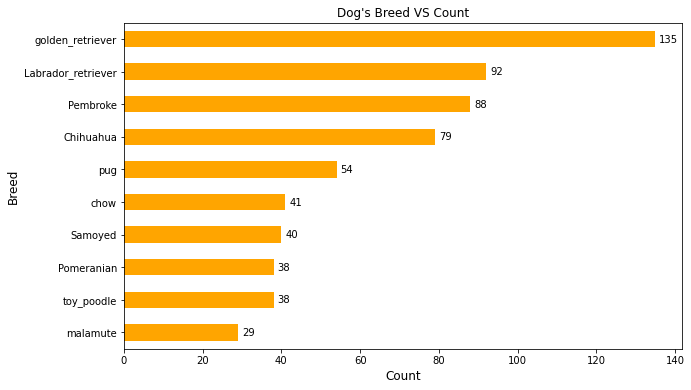

In [91]:
#Plot the top 10 breeds 
plt.figure(figsize=(10,6))
df_master['breed'].value_counts()[0:10].sort_values(ascending=True).plot(kind='barh' , color ='orange')

# Set x_label, y_label and title:
plt.xlabel('Count',size=12)
plt.ylabel('Breed', size=12)
plt.title('Dog\'s Breed VS Count', size=12)

# Set x & y positions to add text over each bar:
x = df_master['breed'].value_counts()[0:10].sort_values(ascending=True).values
y= np.arange(0,10,1)

# Add text (showing value) over each bar:
for xx, yy in zip(x,y):
    plt.text(xx+1,yy,xx , va='center')

> - **Plot a histogram to show up distrbution of rating_numerator**

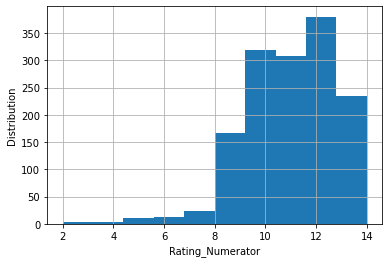

In [93]:
df_master['rating_numerator'].hist()
plt.xlabel('Rating_Numerator')
plt.ylabel('Distribution')
plt.show()

As shown below most of dogs get rating ranges from 8 to 14 and only few dogs get rating less than 8

## Are low rates associated with a particular breed?

> - **Let's check dogs having rating less than 8**

In [95]:
less_than_8 = df_master[df_master['rating_numerator'] < 8]['breed'].value_counts()
less_than_8

Chihuahua                      6
pug                            4
Pembroke                       4
Airedale                       3
soft-coated_wheaten_terrier    2
redbone                        2
Boston_bull                    2
borzoi                         2
dalmatian                      2
Saint_Bernard                  1
Tibetan_terrier                1
Newfoundland                   1
Border_collie                  1
miniature_schnauzer            1
Norwich_terrier                1
black-and-tan_coonhound        1
miniature_pinscher             1
Labrador_retriever             1
Pekinese                       1
malinois                       1
golden_retriever               1
basset                         1
flat-coated_retriever          1
Italian_greyhound              1
Japanese_spaniel               1
Bedlington_terrier             1
Maltese_dog                    1
Lakeland_terrier               1
Rottweiler                     1
bloodhound                     1
Brittany_s

In [100]:
top_10=df_master.groupby('breed')['rating_numerator'].mean().sort_values(ascending= False)[0:10]
top_10

breed
Saluki                12.500000
briard                12.333333
Tibetan_mastiff       12.250000
Border_terrier        12.142857
silky_terrier         12.000000
standard_schnauzer    12.000000
giant_schnauzer       12.000000
Eskimo_dog            11.777778
Gordon_setter         11.750000
Irish_setter          11.750000
Name: rating_numerator, dtype: float64

**No**, Low rate is not associated with particular breed; There are diffrent breeds (few number of dogs in these breeds) got rate less than 8.

## Which breed has the highest rating average

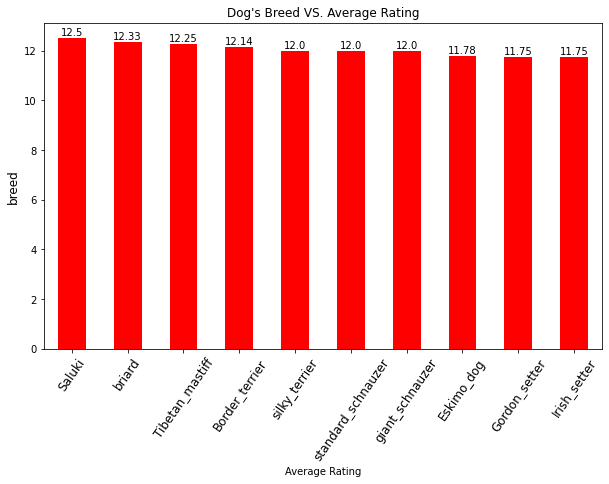

In [101]:
plt.figure(figsize=(10,6))
top_10.plot(kind='bar' , color='red')
plt.xticks(rotation= 55 , size= 12)
plt.xlabel('Average Rating' , size=10)
plt.ylabel('breed' , size= 12)
plt.title('Dog\'s Breed VS. Average Rating');

y= df_master.groupby('breed')['rating_numerator'].mean().sort_values(ascending= False).round(2)
x= np.arange(0,10,1)

for xx,yy in zip(x,y):
    plt.text(xx, yy+.1 , yy , ha='center')

## Which dog breed has the highest average number of tweets and favorites?

> - **Show out top 10 breeds having highest average numbers of retweets and favorites in twitter archive**


In [102]:
top_retweets=df_master.groupby('breed')['retweet_count'].mean()[0:10].sort_values(ascending=False)
top_favorites=df_master.groupby('breed')['favorite_count'].mean()[0:10].sort_values(ascending=False)

In [103]:
top_retweets

breed
Afghan_hound                      5976.000000
Border_terrier                    3377.142857
Australian_terrier                3078.500000
Bedlington_terrier                2863.800000
Blenheim_spaniel                  2583.300000
Border_collie                     2207.750000
American_Staffordshire_terrier    2204.923077
Bernese_mountain_dog              1604.100000
Appenzeller                       1458.000000
Airedale                          1393.750000
Name: retweet_count, dtype: float64

In [104]:
top_favorites

breed
Afghan_hound                      17326.666667
Border_terrier                    13578.000000
Bedlington_terrier                13025.000000
Australian_terrier                11127.500000
Blenheim_spaniel                   9280.900000
Border_collie                      8933.083333
American_Staffordshire_terrier     7559.538462
Appenzeller                        7317.500000
Bernese_mountain_dog               6790.700000
Airedale                           5280.833333
Name: favorite_count, dtype: float64

**Afghan_hound** has the hightst average number of retweets(5976) and favorites(17326)

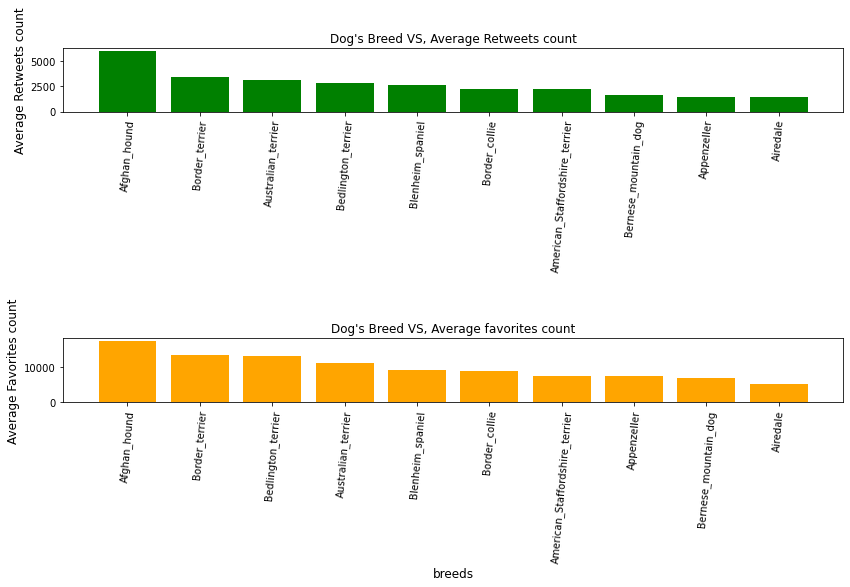

In [107]:
figure= plt.figure(figsize=(13,9))

plt.subplot(2,1,1 )
plt.bar(top_retweets.index, top_retweets.values , color='green')
plt.ylabel('Average Retweets count' , size= 12)
plt.title('Dog\'s Breed VS, Average Retweets count')
plt.xticks(rotation =85)


plt.subplot(2,1,2)
plt.bar(top_favorites.index , top_favorites.values, color='orange')
plt.ylabel('Average Favorites count' , size= 12)
plt.xlabel('breeds' , size= 12)
plt.title('Dog\'s Breed VS, Average favorites count')
plt.xticks(rotation = 85)

figure.tight_layout(pad=5)